*Walmart Store Analysis*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/Users/wasim/Desktop/Projects/Walmart Store Performance/Walmart Store Data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [11]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [12]:
time_range=max(df['Date'])-min(df['Date'])
print(time_range)

994 days 00:00:00


# **Claculation of Key Performance Indicators (KPI)**

1. Total Sales per store

In [13]:
total_sale_per_store= df.groupby('Store')['Weekly_Sales'].sum().reset_index()
total_sale_per_store.columns=['Store','Total_Sales']

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
total_sale_per_store.head()

,Store,Total_Sales
0,1,222402808.85
1,2,275382440.98
2,3,57586735.07
3,4,299543953.38
4,5,45475688.90


2. Average weekly sale per store

In [15]:
avg_weekly_sale_per_store=df.groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_weekly_sale_per_store.columns=['Store', 'Average_Weekly_Sales']

In [16]:
avg_weekly_sale_per_store.head()

,Store,Average_Weekly_Sales
0,1,1555264.40
1,2,1925751.34
2,3,402704.44
3,4,2094712.96
4,5,318011.81


3. Sales Variability per Store

In [17]:
sales_variability_per_store=df.groupby('Store')['Weekly_Sales'].std().reset_index()
sales_variability_per_store.columns=['Store', 'Sales_Variability']

In [18]:
sales_variability_per_store.head()

,Store,Sales_Variability
0,1,155980.77
1,2,237683.69
2,3,46319.63
3,4,266201.44
4,5,37737.97


4. Sales per Store During Holidays

In [19]:
avg_sales_holiday=df[df['Holiday_Flag']==1].groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_sales_holiday.columns = ['Store', 'Avg_Sales_Holiday']

avg_sales_non_holiday = df[df['Holiday_Flag'] == 0].groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_sales_non_holiday.columns = ['Store', 'Avg_Sales_Non_Holiday']

In [20]:
avg_sales_holiday.head()

,Store,Avg_Sales_Holiday
0,1,1665747.66
1,2,2079266.90
2,3,437811.05
3,4,2243102.62
4,5,359501.61


In [21]:
avg_sales_non_holiday.head()

,Store,Avg_Sales_Non_Holiday
0,1,1546957.39
1,2,1914208.81
2,3,400064.85
3,4,2083555.84
4,5,314892.28


# **Visualize Store Performance**

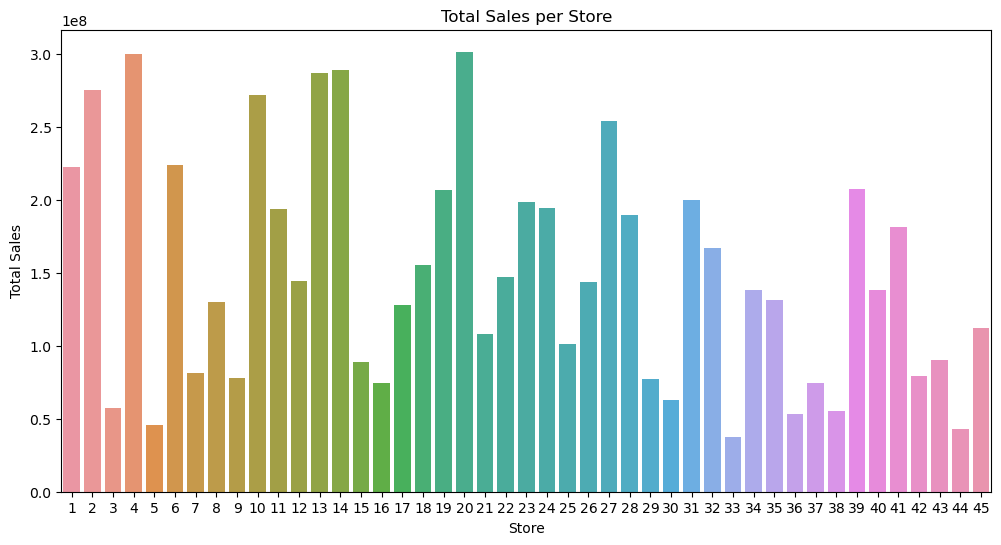

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Total_Sales', data=total_sale_per_store)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales per Store')
plt.show()


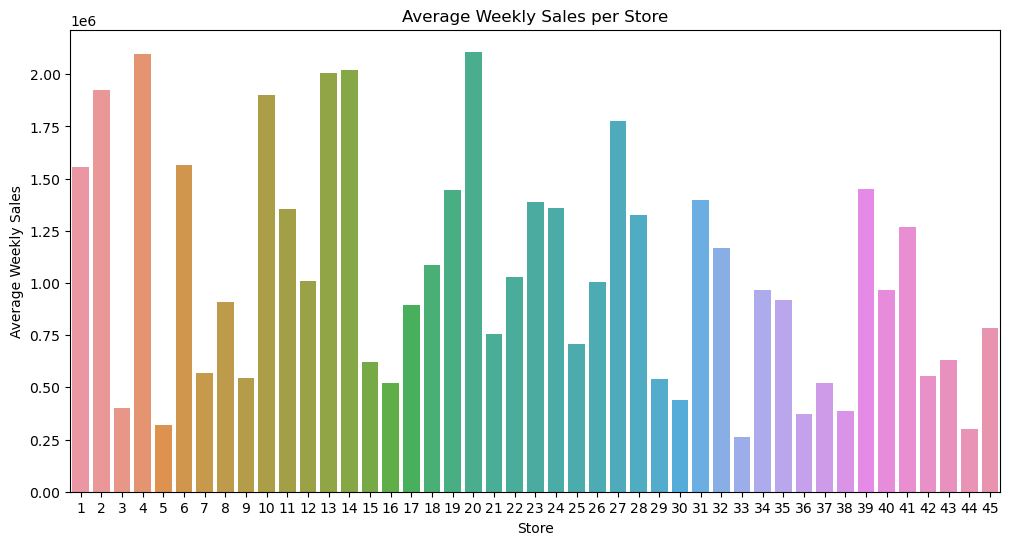

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Average_Weekly_Sales', data=avg_weekly_sale_per_store)
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales per Store')
plt.show()


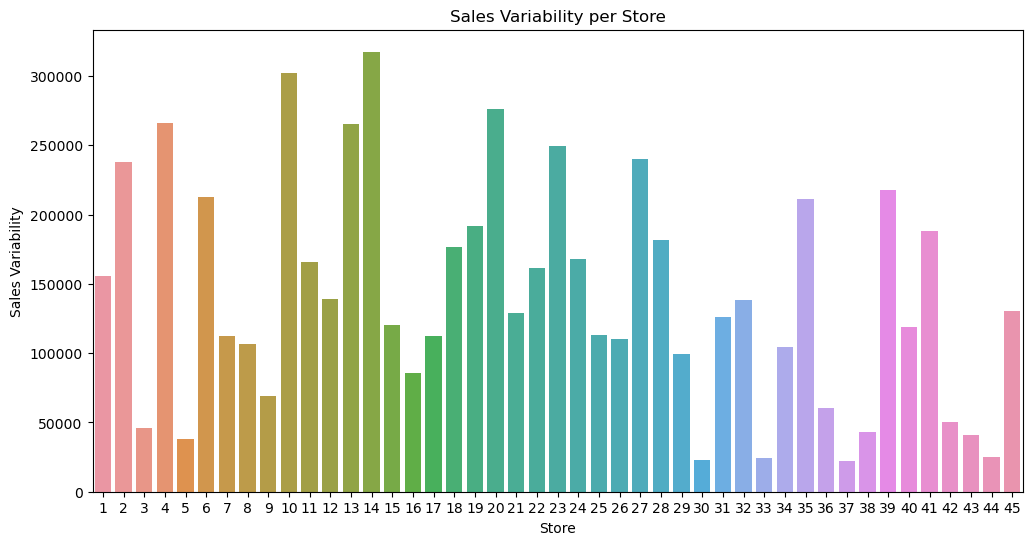

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales_Variability', data=sales_variability_per_store)
plt.xlabel('Store')
plt.ylabel('Sales Variability')
plt.title('Sales Variability per Store')
plt.show()


<Figure size 1200x600 with 0 Axes>

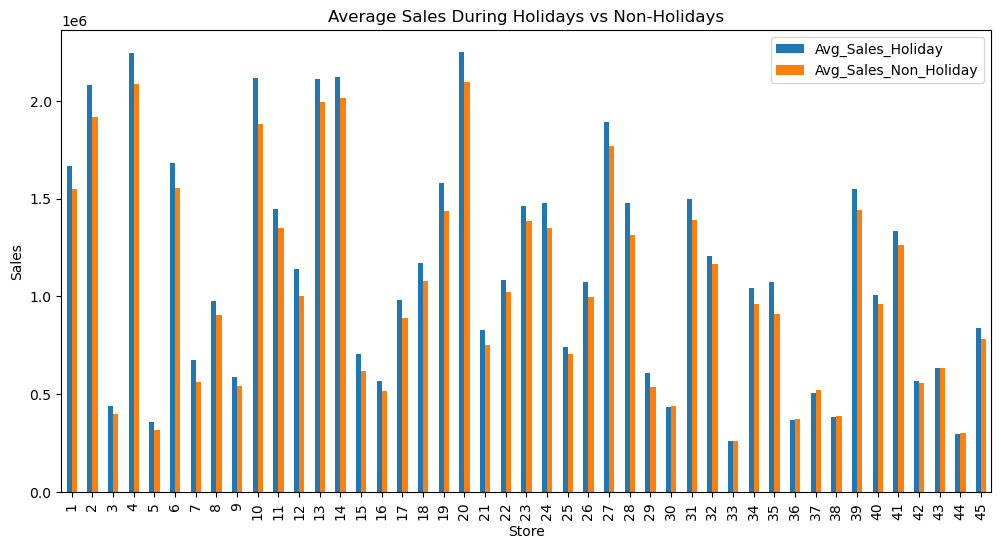

In [25]:
# Merge holiday and non-holiday sales data
holiday_sales = pd.merge(avg_sales_holiday, avg_sales_non_holiday, on='Store')

plt.figure(figsize=(12, 6))
holiday_sales.set_index('Store').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Average Sales During Holidays vs Non-Holidays')
plt.show()

# **Factors Influencing Performance**

 1. Correlation Analysis

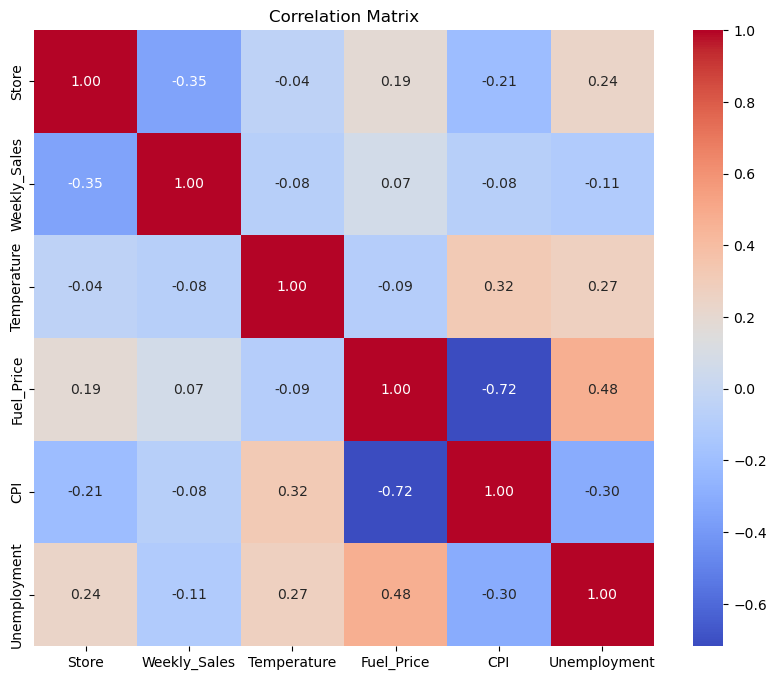

In [26]:
# Calculate correlations between sales and other variables
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

correlations = store_performance.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
